In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [44]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [45]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [46]:
df.shape 

(1338, 7)

In [47]:
df.describe()   # Gives the statistical information about the data

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [48]:
df.isnull().sum()  # No null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Mapping the categorical values to numerical values 

In [49]:
df['sex']=df['sex'].map({'female':0, 'male':1}) 
df['smoker']=df['smoker'].map({'no':0, 'yes':1}) 

In [50]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [51]:
import plotly.express as px

Counting the values of each region

In [56]:
pie = df['region'].value_counts() 
fig = px.pie(df, values=pie.values, names=pie.index, title='Region', color_discrete_sequence=px.colors.sequential.RdBu, hole=0.5)  
fig.show()

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [63]:
df = df.drop(['region'], axis=1) # Dropping the region column

In [64]:
df.head()

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86


In [65]:
df.corr()

,age,sex,bmi,children,smoker,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000


In [66]:
X_data = np.array(df[['age', 'sex', 'bmi', 'smoker']])
Y_data = np.array(df['expenses'])

In [67]:
X_data

array([[19. ,  0. , 27.9,  1. ],
       [18. ,  1. , 33.8,  0. ],
       [28. ,  1. , 33. ,  0. ],
       ...,
       [18. ,  0. , 36.9,  0. ],
       [21. ,  0. , 25.8,  0. ],
       [61. ,  0. , 29.1,  1. ]])

In [68]:
Y_data

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

In [69]:
trainer = LinearRegression()

In [70]:
learner = trainer.fit(X_data, Y_data)

In [71]:
learner.coef_

array([  259.43857897,  -109.06791116,   323.12740129, 23832.79261887])

In [72]:
learner.intercept_

-11635.698818861703

In [74]:
expenses_pred = learner.predict(X_data)

In [75]:
df['expenses_pred'] = expenses_pred

In [76]:
df

,age,sex,bmi,children,smoker,expenses,expenses_pred
0,19,0,27.9,0,1,16884.92,26141.681296
1,18,1,33.8,1,0,1725.55,3846.833855
2,28,1,33.0,3,0,4449.46,6182.717724
3,33,1,22.7,0,0,21984.47,4151.698385
4,32,1,28.9,0,0,3866.86,5895.649694
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,11244.111658
1334,18,0,31.9,0,0,2205.98,3341.959704
1335,18,0,36.9,0,0,1629.83,4957.596710
1336,21,0,25.8,0,0,2007.95,2149.198293


In [77]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(Y_data, expenses_pred)
error

37000464.8709046

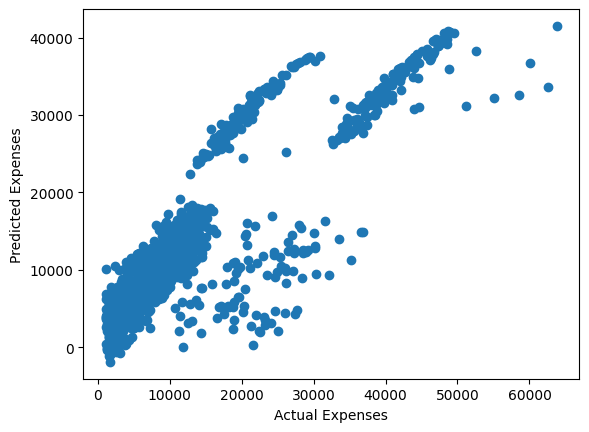

In [89]:
plt.scatter('expenses', 'expenses_pred', data=df)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()

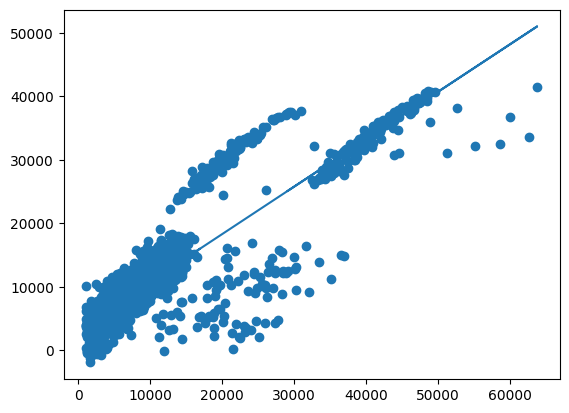

In [88]:
import matplotlib.pyplot as plt
from scipy import stats

x = np.array(df['expenses'])
y = np.array(df['expenses_pred'])

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()